<a href="https://colab.research.google.com/github/nabeelahmedkhan/deeplearningpractice/blob/master/6_IMDBdatasetMoviesReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
# print(train_data[0])
# print(train_labels[0]) 
# print(max([max(i) for i in train_data]))
# print(len(train_data))
word_index = imdb.get_word_index()
index_2_word = dict([(value , key) for (key , value) in word_index.items()])
# print(index_2_word.get(368))
decode_review = ' '.join([index_2_word.get(i - 3 , "?") for i in train_data[0]])
# print(decode_review)

def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    # print(results[0])
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    # print(results[0])
    return results
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)


Using TensorFlow backend.


1646592/1641221 [==============================] - 0s 0us/step


In [2]:
print(train_data[0:3])
train_labels[0:3]
print(max(max(a) for a in train_data))


[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [3]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## Regularizer l2

In [0]:
y_train = np.asarray(train_labels,dtype=np.float32)
y_test = np.asarray(test_labels,dtype=np.float32)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

model = Sequential()
model.add(Dense(4, kernel_regularizer = regularizers.l2(0.001),activation = 'relu',input_shape = (10000,)))
model.add(Dense(4, kernel_regularizer = regularizers.l2(0.001),activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [6]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 3s 184us/step - loss: 0.2339 - acc: 0.7142 - val_loss: 0.2128 - val_acc: 0.8319
Epoch 2/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1959 - acc: 0.8482 - val_loss: 0.1868 - val_acc: 0.8559
Epoch 3/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1710 - acc: 0.8779 - val_loss: 0.1687 - val_acc: 0.8699
Epoch 4/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1525 - acc: 0.8911 - val_loss: 0.1545 - val_acc: 0.8742
Epoch 5/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1386 - acc: 0.8988 - val_loss: 0.1441 - val_acc: 0.8772
Epoch 6/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1286 - acc: 0.9040 - val_loss: 0.1366 - val_acc: 0.8792
Epoch 7/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1206 - acc: 0.9075 - val_loss: 0

In [9]:
results = model.evaluate(x_test,y_test)
print(results)

25000/25000 [==============================] - 4s 172us/step
[0.11458076264858245, 0.87652]


In [10]:
y_predict = model.predict(x_test)
print(y_predict[:5])
print("Actual Y Test: ", y_test[:5])



[[0.26399595]
 [0.97753537]
 [0.93092144]
 [0.7961993 ]
 [0.8758533 ]]
Actual Y Test:  [0. 1. 1. 0. 1.]


In [11]:
history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']


['acc', 'loss', 'val_acc', 'val_loss']

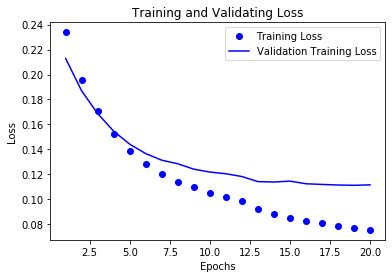

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Training Loss')
plt.title('Training and Validating Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

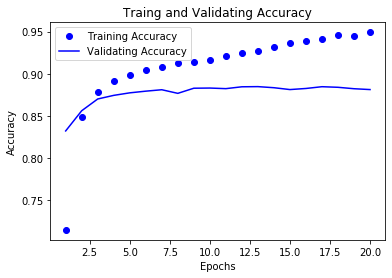

In [13]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values,'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values,'b', label = 'Validating Accuracy')
plt.title('Traing and Validating Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
